In [1]:
import numpy as np
from datetime import datetime
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches


In [5]:
dict_1 = {}
dict_2 = {}
#batting_team = 'Royal Challengers Bangalore'
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
l = []
matches = pd.read_csv(r'C:\Users\aniru\Desktop\matches.csv')
matches.rename(columns={'id': 'match_id'}, inplace=True)
deliveries = pd.read_csv(r'C:\Users\aniru\Desktop\deliveries.csv')
df1 = pd.merge(matches, deliveries, on = 'match_id', how = 'outer')
a = df1.batsman.unique().tolist()
df1['total_batsman'] = 0
df1 = df1.set_index(['batsman'], drop = False)
for i in a :
    df2 = df1[df1['batsman'] == i ]
    df1.loc[i,'total_batsman'] = sum(df2['batsman_runs'])
df3 = df1[['batsman' , 'total_batsman']]
df3 = df3.drop_duplicates(['batsman'])
df4 = df3.sort_values(by = ['total_batsman'], ascending= False)
df4 = df4.reset_index(drop=True)
a = df4.batsman.unique().tolist()[0]
df4


,batsman,total_batsman
0,V Kohli,4115
1,SK Raina,4106
2,RG Sharma,3874
3,G Gambhir,3634
4,CH Gayle,3451
5,RV Uthappa,3390
6,DA Warner,3373
7,MS Dhoni,3270
8,AB de Villiers,3270
9,S Dhawan,3082


In [2]:
def analysis (df5, a) :
    y = df5[df5['batsman']==a]['batting_team'].unique()[0]
#y = df6.iloc[0]['batting_team']
    df5 = df5[df5['batting_team']==y]
    df5 = df5.set_index('batting_team' , drop=False)
#y
    batsman_runs = sum(df5[df5['batsman']==a]['batsman_runs'])
    team_runs = sum(df5['batsman_runs'])
    percentage_runs = round(batsman_runs/team_runs*100)
    df5.loc[y,'total_runs_by_'+a] = sum(df5[df5['batsman']==a]['batsman_runs'])
    df5.loc[y, 'total_runs_by_team'] = sum(df5['batsman_runs'])
    df5.loc[y,'percentage_runs_by_'+a] = percentage_runs
    df5 = df5[['season','total_runs_by_team','total_runs_by_'+a,'percentage_runs_by_'+a]].drop_duplicates()
    return df5 

In [4]:
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
appended_data = []
for i in x :
    df5 = pd.read_csv(i)
    df5= analysis(df5, a)
    appended_data.append(df5)
appended_data = pd.concat(appended_data, axis=0)
appended_data.set_index(['season'])

,total_runs_by_team,total_runs_by_V Kohli,percentage_runs_by_V Kohli
season,,,
2008,1865,165,9.0
2009,2166,246,11.0
2010,2272,307,14.0
2011,2325,557,24.0
2012,2351,364,15.0
2013,2460,639,26.0
2014,1992,359,18.0
2015,2190,505,23.0
2016,2863,973,34.0


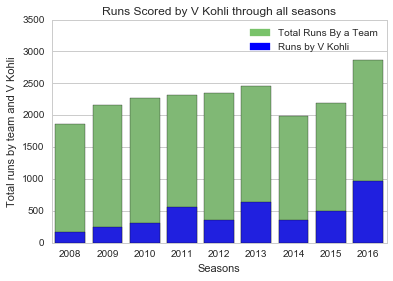

In [13]:
fig = plt.figure() 
sns.barplot(x =appended_data.season , y = appended_data['total_runs_by_team'] , color = "#79c36a")
bottom_plot = sns.barplot(x = appended_data.season, y = appended_data['total_runs_by_' + a], color = "blue")
sns.set_style('whitegrid')
bottom_plot.set(xlabel='Seasons', ylabel='Total runs by team and ' + a, title = 'Runs Scored by ' + a + ' through all seasons')
red_patch = mpatches.Patch(color='#79c36a', label='Total Runs By a Team')
blue_patch  = mpatches.Patch(color = 'blue' , label = 'Runs by ' + a)
plt.legend(handles=[red_patch,blue_patch])
plt.ylim([0,3500])
sns.set_style('whitegrid')